In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random

Topics:
  * Differential equations
  * Euler's method [(cheat sheet)](https://ms.mcmaster.ca/~pocucan/1mp3/diffy_cheat_sheet.png)
  * NumPy Random (time permitting)

--- 

**Exercise 1**

Write the rate of change functions (`da_dt(a, t, k)`, `db_dt(b, t, k)`, `dc_dt(c, t, k)`) for the differential equations given by the following descriptions:

  a. The rate of change $\frac{da}{dt}$ is proportional to the square of time elapsed and inversely proportional to the quantity $a$
  
  b. The rate of change $\frac{db}{dt}$ is inversely proportional to the square root of the time elapsed cubed and inversely proportional to the square of the quantity $b$
  
  c. The rate of change $\frac{dc}{dt}$ is inversely proportional to the exponential of twice time elapsed and proportional to the sine of $\pi$ times the quantity $c$

---

$$\frac{da}{dt} = \frac{kt^{2}}{a}$$

$$\frac{db}{dt} = \frac{k}{b^{2}\sqrt{t^{3}}}$$

$$\frac{dc}{dt} = \frac{k\text{sin}(\pi c)}{e^{2t}}$$

In [59]:
def da_dt(a, t, k):
    result = (k * (t ** 2)) / a
    return result

def db_dt(b, t, k):
    result = k / (np.sqrt(t ** 3) * (b ** 2))
    return result

def dc_dt(c, t, k):
    result = (k * np.sin(np.pi * c)) / np.exp(2 * t)
    return result

**Exercise 2**

The rate of change of a population is proportional to the product of the population and time elapsed. 
  * What differential equation represents this system?
  * Graph this differential equation, assuming an initial population of $100$ and $k=\frac{1}{e^{2}}$

---

Differential equation:

$$
\frac{dP}{dt} = kPt
$$

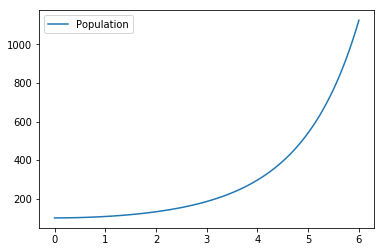

In [11]:
def dP_dt(P_i, t_i, k):
    return k * P_i * t_i

P = np.array([100])
k = 1/np.exp(2)

t = np.linspace(0, 6, 100)
h = t[1] - t[0]

for i in range(len(t)):
    P_change = dP_dt(P[i], t[i], k)
    P_new = P[i] + h*P_change
    P = np.append(P, P_new)

plt.plot(t, P[1:], label='Population')
plt.legend()
plt.show()

**Exercise 3**

Consider the following differential equation, where $y$ is some function of $x$:

$$
\frac{dy}{dx} = (y^{2}-y-2)(1-y)^{2}
$$

Graph this differential equation with the following initial values:
  * $y(0) = -5/2$
  * $y(0) = -2$
  * $y(0) = -3/2$
  * $y(0) = -1$
  * $y(0) = -1/2$
  * $y(0) = 0$
  * $y(0) = 1/2$
  * $y(0) = 1$
  * $y(0) = 3/2$
  * $y(0) = 2$

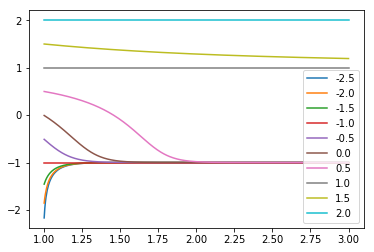

In [12]:
def dy_dx(y_i):
    result = ((y_i ** 2) - y_i - 2)*((1 - y_i) ** 2)
    return result

def graph(y_0):
    x = np.linspace(1, 3, 500)
    h = x[1] - x[0]
    y = np.array([y_0])
    
    for i in range(len(x)):
        y_change = dy_dx(y[i])
        y_new = y[i] + h * y_change
        y = np.append(y, y_new)
    
    plt.plot(x, y[1:], label=str(y_0))


for j in range(-5, 5):
    graph(j/2)

plt.legend(loc='lower right')
plt.show()

**Exercise 4**

The differential equation 
$$\frac{dP}{dt} = P(t)(k\cdot\text{cos}(t)),$$ 
where $k$ is a positive constant, is a mathematical model for a population $P(t)$ that undergoes yearly seasonal fluctuations.

---

Take $k = 1/10$ and an initial population of 30.

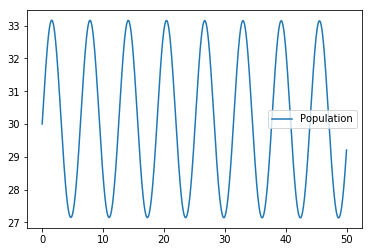

In [78]:
def dP_dt(P_i, t_i, k):
    return P_i * k * np.cos(t_i)

k = 1/10  # some constant 
P = np.array([30])  # population, initially at 30

t = np.linspace(0, 50, 10000)  # sample points in time
h = t[1] - t[0]  # delta t

for i in range(len(t)):
    P_change = dP_dt(P[i], t[i], k)
    P_now = P[i] + h * P_change
    P = np.append(P, P_now)

plt.plot(t, P[1:])
plt.title('Population with Seasonal Fluctuations')
plt.show()

**Exercise 5** - 
_The Monty Hall Problem_


The Monty Hall Problem is a well-known probability-based problem which arose from the TV-show, _Let's Make a Deal_.
The set up goes like this:

There are three doors.
Behind one door is a car and behind the other two are goats. 
You want to pick the door which reveals the car.

You pick a door, and the host opens a different door which reveals a goat.
You are then given a choice: would you like to **stick** with your original choice, or **switch** to the remaining door?

For example: you pick door number 1. 
The host shows you that behind door number 3 is a goat. 
So, you now know that the car is either in door number 1 or door number 2. 
You then have the choice: would you like to **stick** with your choice of door number 1, or **switch** to the remaining door, door number 2.

The Monty Hall Problem asks: which strategy is better? Is it more favourable to stick or switch? Is there a difference at all?

In [122]:
def monty_doors():
    # array containing two 0s (goats) and a 1 (car)
    doors = np.array([0, 0, 1])
    # shuffle them
    random.shuffle(doors)
    return doors   

In [123]:
# because we are going to want to simulate many rounds, we will make our first pick randomly
def pick_door():
    return random.choice([0, 1, 2])

In [124]:
def monty_round():
    # door set up:
    doors = monty_doors()
    
    # our pick:
    door_choice_index = pick_door()
    
    # corresponding_doors is a dictionary that takes an int: 1, 2, or 3 as a key (corresponding to our choice)
    # and maps those to the indices of `doors` which correspond to the doors we have not picked
    corresponding_doors = {0:'12', 1: '02', 2: '01'}
    remaining_doors = corresponding_doors[door_choice_index]  # the remaining doors, given our choice
    
    # we now have two doors to pick from: which one should we choose?
    for index in range(len(doors)):
        if doors[index] == 0 and str(index) in remaining_doors:
            goat_door = index
            break
    
    # we can then find the index of the other remaining door
    # we know that the indicies of the doors will sum to 3: 0 + 1 + 2 = 3 
    # rearranging:
    last_door = 3 - (goat_door + (door_choice_index))
    
#     # return 'stick' if stick wins
#     # return 'switch' if switch wins
#     if doors[door_choice_index] == 1:
#         return 'stick'
#     elif doors[last_door] == 1:
#         return 'switch'
#     else:
#         return 'error'
    
    # it doesn't look like we're getting `error` at all, so let's change it to this:
    if doors[door_choice_index] == 1:
        return 'stick'
    else:
        return 'switch'

In [125]:
def simulate_monty(num_rounds):
    winning = [0, 0]  # [stick, switch]
    for i in range(num_rounds):
        choice = monty_round()
        winning[choice == 'switch'] += 1  
    
    return winning

In [126]:
def plot_monty(results_list):
    plt.pie(results_list, labels=['stick', 'switch'], autopct='%.2f')
    plt.show()

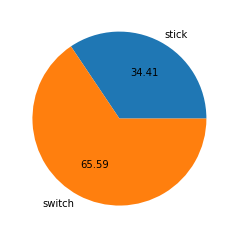

In [128]:
winners = simulate_monty(10000)
plot_monty(winners)